# Model Analysis 

This program takes in datasets and models, and computes the loss landscapes over varying amounts of data.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import time
import glob

# Importing our existing funcs
import os
import sys
from pathlib import Path

from minima_volume.dataset_funcs import ( load_models_and_data )

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Model

In [2]:
# User specifies the model module name
from minima_volume.models import modulo_arithmetic_model_data as model_module
modulus = 97

# MNIST specific initialization parameters
hidden_dims = [250]

# Grab model
model_template = model_module.get_model(N = modulus, hidden_dims=hidden_dims, device=device, seed=0)

# Grab loss and metrics
loss_fn_per_sample = model_module.get_loss_fn_per_sample()

## Loading Model and Datasets

In [3]:
# Get the relative path
target_dir = Path("models_and_data") #current directory

# Lists to store loaded models and additional data
loaded_models, loaded_additional_data, loaded_dataset = load_models_and_data(model_template=model_template, target_dir=target_dir, device="cpu")

# Print dataset information
print(f"Dataset type: {loaded_dataset['dataset_type']}")
print(f"Dataset quantities: {loaded_dataset['dataset_quantities']}")

# Print tensor shapes
print("\nTensor shapes:")
for key in ["x_base_train", "y_base_train", "x_additional", "y_additional", "x_test", "y_test"]:
    if loaded_dataset[key] is not None:
        print(f"  {key}: {loaded_dataset[key].shape}")
    else:
        print(f"  {key}: None")

Looking for models and dataset in: models_and_data
Found 9 model files:
  - model_epoch_1000.pt
  - model_epoch_1500.pt
  - model_epoch_200.pt
  - model_epoch_2000.pt
  - model_epoch_3000.pt
  - model_epoch_400.pt
  - model_epoch_4000.pt
  - model_epoch_600.pt
  - model_epoch_800.pt
✅ Model loaded into provided instance from models_and_data\model_epoch_1000.pt
Successfully loaded: model_epoch_1000.pt


✅ Model loaded into provided instance from models_and_data\model_epoch_1500.pt
Successfully loaded: model_epoch_1500.pt
✅ Model loaded into provided instance from models_and_data\model_epoch_200.pt
Successfully loaded: model_epoch_200.pt
✅ Model loaded into provided instance from models_and_data\model_epoch_2000.pt
Successfully loaded: model_epoch_2000.pt
✅ Model loaded into provided instance from models_and_data\model_epoch_3000.pt
Successfully loaded: model_epoch_3000.pt


✅ Model loaded into provided instance from models_and_data\model_epoch_400.pt
Successfully loaded: model_epoch_400.pt


✅ Model loaded into provided instance from models_and_data\model_epoch_4000.pt
Successfully loaded: model_epoch_4000.pt
✅ Model loaded into provided instance from models_and_data\model_epoch_600.pt
Successfully loaded: model_epoch_600.pt
✅ Model loaded into provided instance from models_and_data\model_epoch_800.pt
Successfully loaded: model_epoch_800.pt

Model data loaded from all models:
Model 0 (model_epoch_1000.pt):
  - Additional data: 0
  - Dataset type: data
  - Training accuracies: 1000 entries
  - Test accuracies: 1000 entries
Model 1 (model_epoch_1500.pt):
  - Additional data: 0
  - Dataset type: data
  - Training accuracies: 1500 entries
  - Test accuracies: 1500 entries
Model 2 (model_epoch_200.pt):
  - Additional data: 0
  - Dataset type: data
  - Training accuracies: 200 entries
  - Test accuracies: 200 entries
Model 3 (model_epoch_2000.pt):
  - Additional data: 0
  - Dataset type: data
  - Training accuracies: 2000 entries
  - Test accuracies: 2000 entries
Model 4 (model_

✅ Dataset loaded from models_and_data\dataset.pt
Dataset type: data
Dataset quantities: [0]

Tensor shapes:
  x_base_train: torch.Size([3104, 194])
  y_base_train: torch.Size([3104, 97])
  x_additional: torch.Size([0, 194])
  y_additional: torch.Size([0, 97])
  x_test: torch.Size([9409, 194])
  y_test: torch.Size([9409, 97])



Epochs trained for first model: 1000

Extracted data:
Model 0: Epochs trained = 200, Final test accuracy = 0.3214
Model 1: Epochs trained = 400, Final test accuracy = 0.3341
Model 2: Epochs trained = 600, Final test accuracy = 0.3565
Model 3: Epochs trained = 800, Final test accuracy = 0.4221
Model 4: Epochs trained = 1000, Final test accuracy = 0.6028
Model 5: Epochs trained = 1500, Final test accuracy = 0.9681
Model 6: Epochs trained = 2000, Final test accuracy = 0.9994
Model 7: Epochs trained = 3000, Final test accuracy = 1.0000
Model 8: Epochs trained = 4000, Final test accuracy = 1.0000


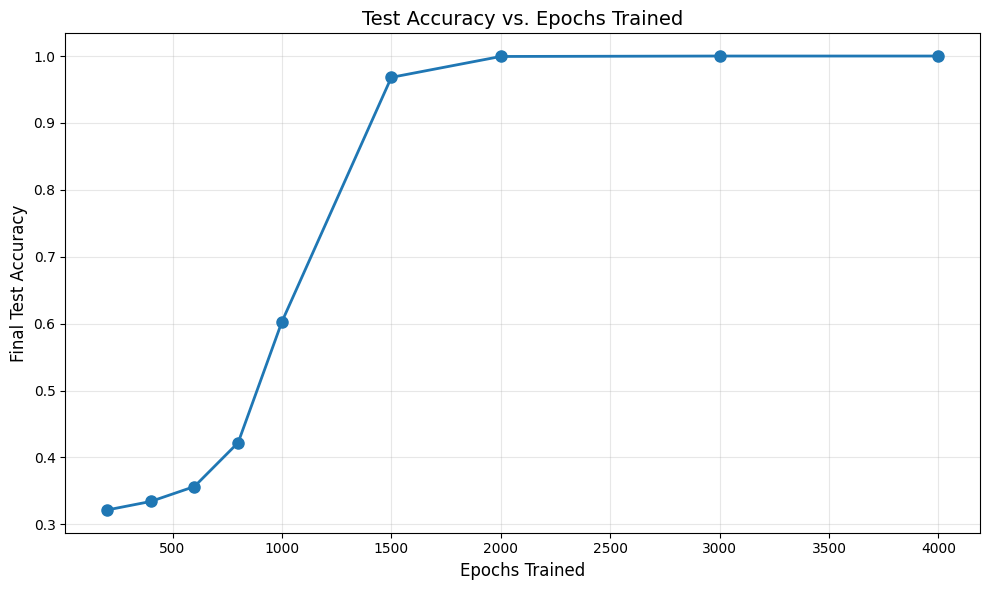


Summary statistics:
Number of models: 9
Epochs trained range: 200 to 4000
Accuracy range: 0.3214 to 1.0000
Mean accuracy: 0.6672

Saved data!


In [4]:
# Extract epochs trained and final test accuracies
epochs_trained = np.array([model_data['total_epochs_trained'] for model_data in loaded_additional_data])
final_test_accuracies = np.array([model_data['test_accs'][-1] for model_data in loaded_additional_data])

# Sort by epochs trained for plotting
sort_indices = np.argsort(epochs_trained)
epochs_trained = epochs_trained[sort_indices]
final_test_accuracies = final_test_accuracies[sort_indices]

# Print the data
print(f"\nEpochs trained for first model: {loaded_additional_data[0]['total_epochs_trained']}")
print("\nExtracted data:")
for i, (ep, acc) in enumerate(zip(epochs_trained, final_test_accuracies)):
    print(f"Model {i}: Epochs trained = {ep}, Final test accuracy = {acc:.4f}")

# Plot final test accuracy vs. epochs trained
plt.figure(figsize=(10, 6))
plt.plot(epochs_trained, final_test_accuracies, 'o-', markersize=8, linewidth=2)
plt.xlabel('Epochs Trained', fontsize=12)
plt.ylabel('Final Test Accuracy', fontsize=12)
plt.title('Test Accuracy vs. Epochs Trained', fontsize=14)
plt.grid(True, alpha=0.3)
#plt.ylim((0.5, 1.0))
plt.tight_layout()
plt.show()

# Optional summary statistics
print(f"\nSummary statistics:")
print(f"Number of models: {len(epochs_trained)}")
print(f"Epochs trained range: {epochs_trained.min()} to {epochs_trained.max()}")
print(f"Accuracy range: {final_test_accuracies.min():.4f} to {final_test_accuracies.max():.4f}")
print(f"Mean accuracy: {final_test_accuracies.mean():.4f}")

# Save arrays
np.savez("test_accuracies.npz",
         epochs_trained=epochs_trained,
         final_test_accuracies=final_test_accuracies)
print("\nSaved data!")
